In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Definir la función para el pulso rectangular
def pulso_rectangular(t, ancho):
    return np.where(np.abs(t) <= ancho/2, 1, 0)

In [11]:
# Definir la función para el pulso sinc en el dominio temporal
def pulso_sinc(t):
    return np.sinc(t)

In [12]:
# Definir la función para el pulso de coseno elevado
def pulso_coseno_elevado(t, alpha, Ts):
    numerador = np.sin(np.pi * t * (1 - alpha) / Ts) + 4 * alpha * t / Ts * np.cos(np.pi * t * (1 + alpha) / Ts)
    denominador = np.pi * t * (1 - (4 * alpha * t / Ts) ** 2) / Ts
    return np.where(np.abs(denominador) > 0, numerador / denominador, 1)

In [13]:
# Transformada de Fourier
def transformada_fourier(senal, t):
    dt = t[1] - t[0]
    f = np.fft.fftfreq(len(t), d=dt)
    return np.fft.fftshift(f), np.fft.fftshift(np.abs(np.fft.fft(senal)))

In [14]:
# Definir el dominio temporal
t = np.linspace(-1, 1, 1000)

In [15]:
# Pulsos
rectangular = pulso_rectangular(t, 0.5)
sinc = pulso_sinc(t)
coseno_elevado = pulso_coseno_elevado(t, 0.5, 0.5)

In [16]:
# Transformadas de Fourier
f_rectangular, FT_rectangular = transformada_fourier(rectangular, t)
f_sinc, FT_sinc = transformada_fourier(sinc, t)
f_coseno_elevado, FT_coseno_elevado = transformada_fourier(coseno_elevado, t)

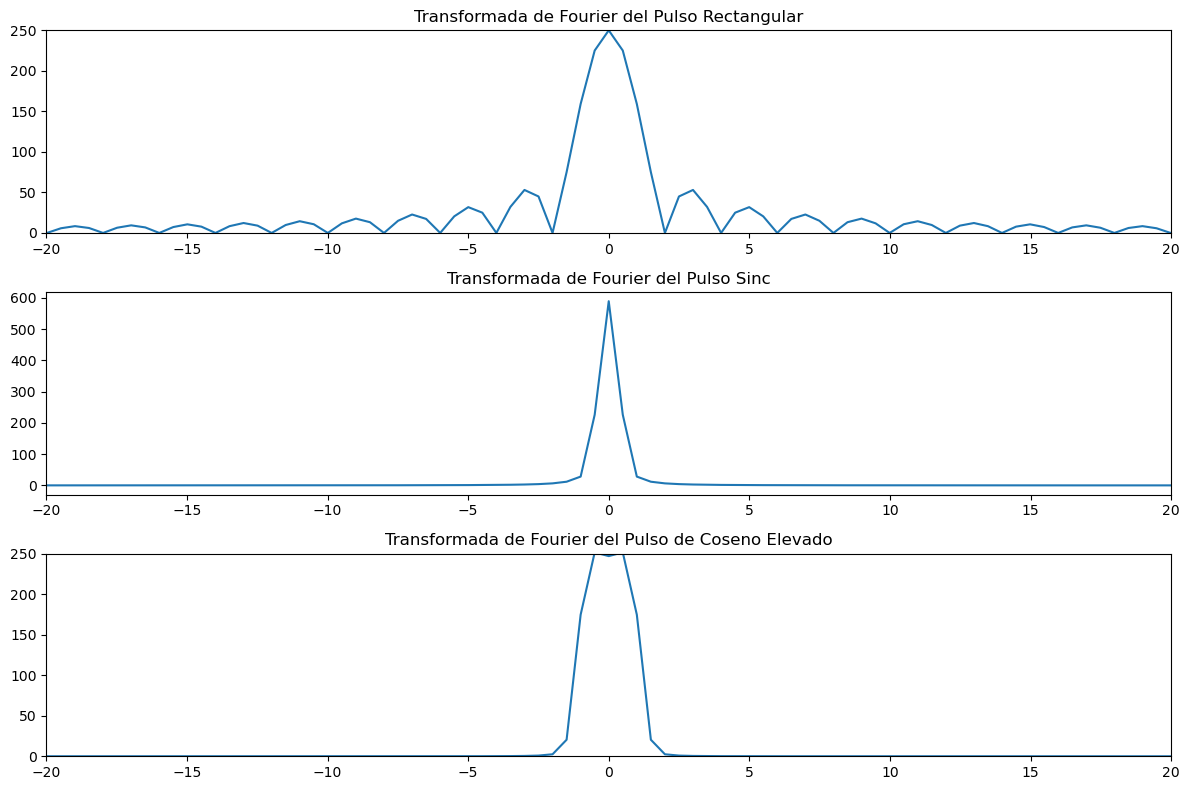

In [17]:
# Gráficos de las transformadas de Fourier
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(f_rectangular, FT_rectangular)
plt.xlim(-20, 20)       # Ajustar escala de frecuencia
plt.ylim(0, 250)   # Ajustar escala de amplitud
plt.title("Transformada de Fourier del Pulso Rectangular")

plt.subplot(3, 1, 2)
plt.plot(f_sinc, FT_sinc)
plt.xlim(-20, 20)        # Ajustar escala de frecuencia
plt.title("Transformada de Fourier del Pulso Sinc")

plt.subplot(3, 1, 3)
plt.plot(f_coseno_elevado, FT_coseno_elevado)
plt.xlim(-20, 20)   # Ajustar escala de frecuencia
plt.ylim(0, 250)   # Ajustar escala de amplitud
plt.title("Transformada de Fourier del Pulso de Coseno Elevado")

plt.tight_layout()
plt.show()

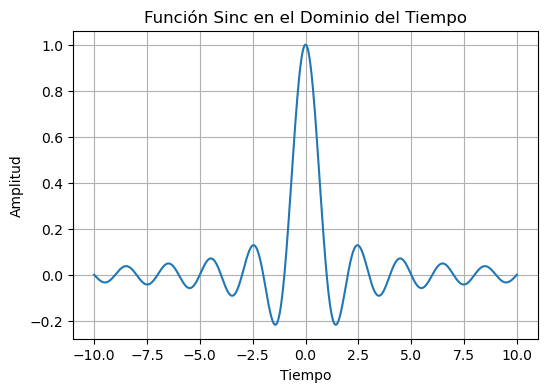

In [18]:
# Gráfico del pulso sinc en el dominio del tiempo

# Definir el dominio temporal más amplio para visualizar mejor el pulso sinc
t_sinc = np.linspace(-10, 10, 1000)

# Generar la señal sinc
senal_sinc = pulso_sinc(t_sinc)

# Graficar la función sinc en el dominio temporal
plt.figure(figsize=(6, 4))
plt.plot(t_sinc, senal_sinc)
plt.title("Función Sinc en el Dominio del Tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

In [19]:
from scipy.integrate import quad

In [20]:
def espectro_pulso_rectangular(f, T):
    return T * np.sinc(f * T)

In [21]:
def porcentaje_energia(fb, T, energia_total):
    integrando = lambda f: np.abs(espectro_pulso_rectangular(f, T))**2
    energia, _ = quad(integrando, -fb, fb)
    return energia / energia_total

In [22]:
T = 1
energia_total = T
fb = np.linspace(0, 5/T, 500)
porcentaje_energia = [porcentaje_energia(f, T, energia_total) for f in fb]

In [23]:
# Encontrar la frecuencia donde se contiene el 90% de la energía
for i, pct in enumerate(porcentaje_energia):
    if pct >= 0.9:
        medio_ancho_banda_90 = fb[i]
        break

print(f"Ancho de banda que contiene el 90% de la energía: {2 * medio_ancho_banda_90} Hz")


Ancho de banda que contiene el 90% de la energía: 1.7034068136272544 Hz


solucion warnings

Ancho de banda que contiene el 90% de la energía: 1.7017 Hz


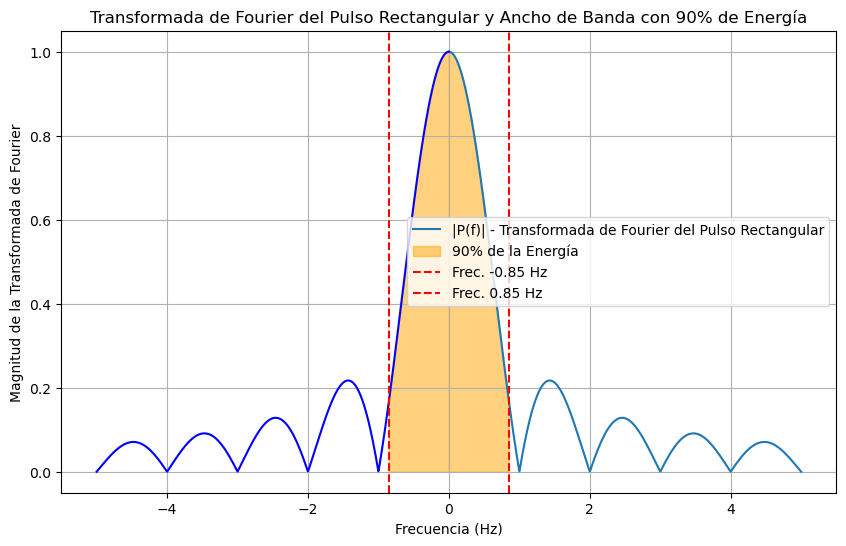

In [24]:
# Parámetros
T = 1  # Duración del pulso
f_max = 5 / T  # Frecuencia máxima para la gráfica
N = 1000  # Número de puntos para la gráfica

# Vector de frecuencias positivas
f = np.linspace(0, f_max, N)

# Transformada de Fourier del pulso rectangular (espectro del pulso)
P_f = T * np.sinc(f * T)

# Cálculo de la densidad espectral de potencia
PSD = np.abs(P_f)**2

# Energía total (usando resultado analítico)
energia_total = T

# Cálculo de la energía acumulada de manera simétrica
energia_acumulada = np.zeros_like(f)
for i in range(len(f)):
    # Integrar desde -f[i] hasta f[i] (integración simétrica)
    energia_acumulada[i], _ = quad(lambda freq: (T * np.sinc(freq * T))**2, -f[i], f[i], limit=100)

# Normalización de la energía acumulada
energia_acumulada = energia_acumulada / energia_total

# Encontrar la frecuencia que contiene el 90% de la energía
indice_90 = np.where(energia_acumulada >= 0.9)[0][0]
f_90 = f[indice_90]
ancho_banda_90 = 2 * f_90  # Ancho de banda total

print(f"Ancho de banda que contiene el 90% de la energía: {ancho_banda_90:.4f} Hz")

# Gráfica de la magnitud de la transformada de Fourier
plt.figure(figsize=(10, 6))

# Gráfica para frecuencias positivas
plt.plot(f, np.abs(P_f), label='|P(f)| - Transformada de Fourier del Pulso Rectangular')
plt.fill_between(f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5, label='90% de la Energía')

# Gráfica para frecuencias negativas (reflexión)
plt.plot(-f, np.abs(P_f), color='blue')
plt.fill_between(-f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5)

# Líneas verticales que indican las frecuencias límites
plt.axvline(x=-f_90, color='r', linestyle='--', label=f'Frec. -{f_90:.2f} Hz')
plt.axvline(x=f_90, color='r', linestyle='--', label=f'Frec. {f_90:.2f} Hz')

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud de la Transformada de Fourier')
plt.title('Transformada de Fourier del Pulso Rectangular y Ancho de Banda con 90% de Energía')
plt.legend()
plt.grid(True)
plt.show()


Ancho de banda que contiene el 90% de la energía: 0.9009 Hz


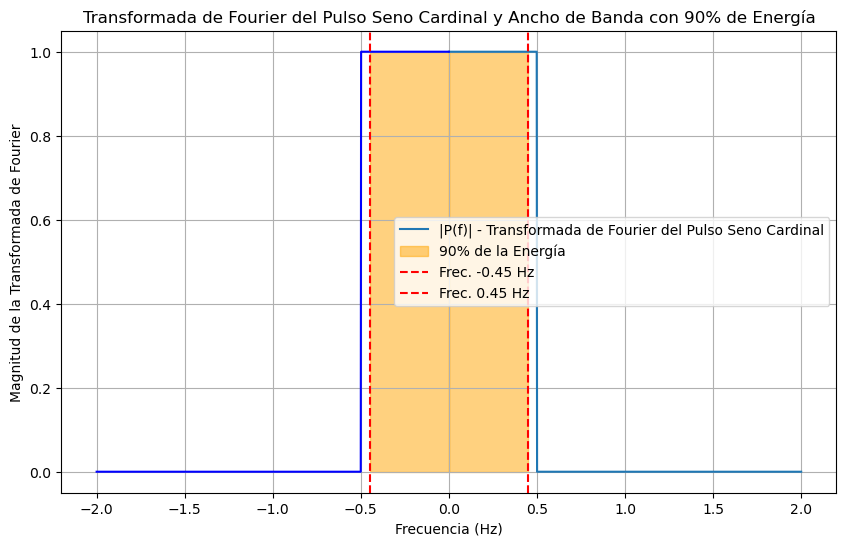

In [25]:
# Parámetros
T = 1  # Duración del pulso
f_max = 2 / T  # Frecuencia máxima para la gráfica
N = 1000  # Número de puntos para la gráfica

# Vector de frecuencias positivas
f = np.linspace(0, f_max, N)

# Transformada de Fourier del pulso seno cardinal (espectro rectangular)
P_f = T * np.where(f <= (1 / (2 * T)), 1, 0)

# Cálculo de la densidad espectral de potencia
PSD = np.abs(P_f)**2

# Energía total (usando resultado analítico)
energia_total = T

# Cálculo de la energía acumulada de manera simétrica
energia_acumulada = np.zeros_like(f)
for i in range(len(f)):
    # Integrar desde -f[i] hasta f[i] (integración simétrica)
    if f[i] <= (1 / (2 * T)):
        energia_acumulada[i] = PSD[0] * (2 * f[i])
    else:
        energia_acumulada[i] = PSD[0] * (1 / T)  # Energía total

# Normalización de la energía acumulada
energia_acumulada = energia_acumulada / energia_total

# Encontrar la frecuencia que contiene el 90% de la energía
indice_90 = np.where(energia_acumulada >= 0.9)[0][0]
f_90 = f[indice_90]
ancho_banda_90 = 2 * f_90  # Ancho de banda total

print(f"Ancho de banda que contiene el 90% de la energía: {ancho_banda_90:.4f} Hz")

# Gráfica de la magnitud de la transformada de Fourier
plt.figure(figsize=(10, 6))

# Gráfica para frecuencias positivas
plt.plot(f, np.abs(P_f), label='|P(f)| - Transformada de Fourier del Pulso Seno Cardinal')
plt.fill_between(f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5, label='90% de la Energía')

# Gráfica para frecuencias negativas (reflexión)
plt.plot(-f, np.abs(P_f), color='blue')
plt.fill_between(-f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5)

# Líneas verticales que indican las frecuencias límites
plt.axvline(x=-f_90, color='r', linestyle='--', label=f'Frec. -{f_90:.2f} Hz')
plt.axvline(x=f_90, color='r', linestyle='--', label=f'Frec. {f_90:.2f} Hz')

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud de la Transformada de Fourier')
plt.title('Transformada de Fourier del Pulso Seno Cardinal y Ancho de Banda con 90% de Energía')
plt.legend()
plt.grid(True)
plt.show()


Alpha = 0.25: Ancho de banda que contiene el 90% de la energía: 0.8509 Hz


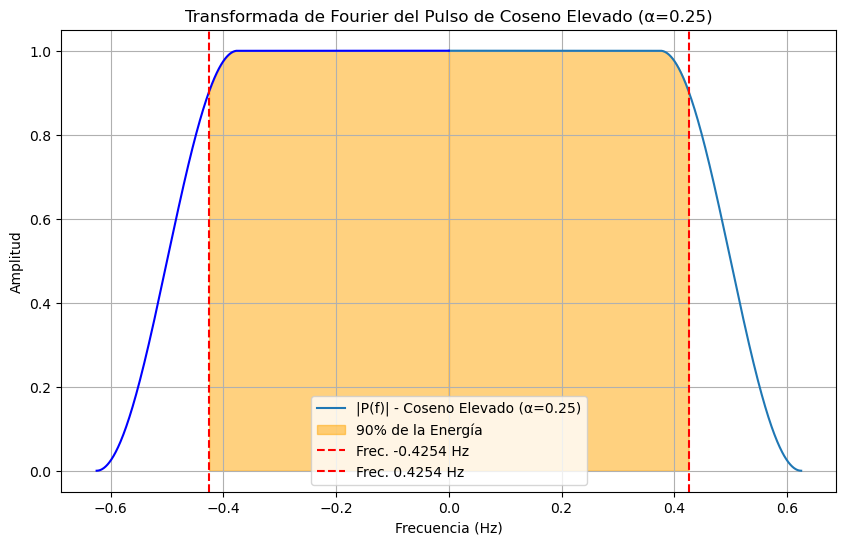

Alpha = 0.5: Ancho de banda que contiene el 90% de la energía: 0.8483 Hz


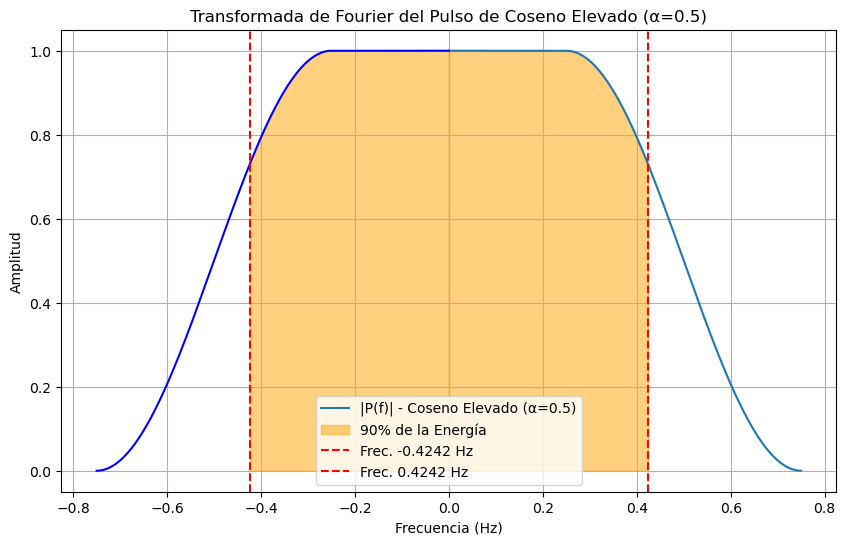

Alpha = 0.75: Ancho de banda que contiene el 90% de la energía: 0.8794 Hz


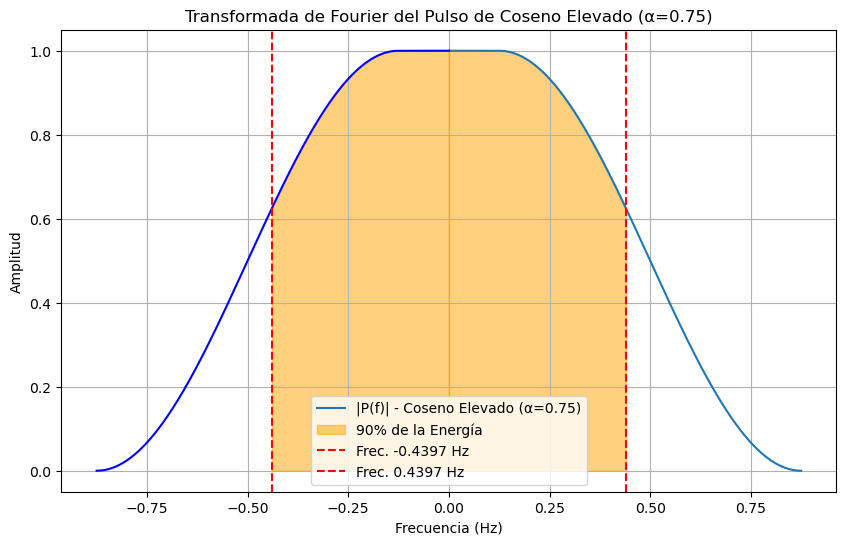

In [26]:
# Función para calcular P(f) del pulso de coseno elevado
def P_f_coseno_elevado(f, T, alpha):
    B = (1 + alpha) / (2 * T)
    f0 = (1 - alpha) / (2 * T)
    abs_f = np.abs(f)
    if abs_f <= f0:
        return T
    elif f0 < abs_f <= B:
        return (T / 2) * (1 + np.cos(np.pi * T / alpha * (abs_f - f0)))
    else:
        return 0

# Parámetros
T = 1
alpha_values = [0.25, 0.5, 0.75]
N = 1000

for alpha in alpha_values:
    B = (1 + alpha) / (2 * T)  # Ancho de banda máximo
    f = np.linspace(0, B, N)
    
    # Calculamos P(f) para cada frecuencia
    P_f = np.array([P_f_coseno_elevado(fi, T, alpha) for fi in f])
    
    # Densidad espectral de potencia
    PSD = np.abs(P_f)**2
    
    # Energía total (integral de PSD en todo el espectro)
    energia_total = np.trapz(PSD, f) * 2  # Multiplicamos por 2 por simetría
    
    # Energía acumulada
    energia_acumulada = np.zeros_like(f)
    for i in range(len(f)):
        energia_acumulada[i] = np.trapz(PSD[:i+1], f[:i+1]) * 2  # Multiplicamos por 2 por simetría
    
    # Normalización
    energia_acumulada = energia_acumulada / energia_total
    
    # Encontrar la frecuencia que contiene el 90% de la energía
    indice_90 = np.where(energia_acumulada >= 0.9)[0][0]
    f_90 = f[indice_90]
    ancho_banda_90 = 2 * f_90
    
    print(f"Alpha = {alpha}: Ancho de banda que contiene el 90% de la energía: {ancho_banda_90:.4f} Hz")
    
    # Gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(f, np.abs(P_f), label=f'|P(f)| - Coseno Elevado (α={alpha})')
    plt.fill_between(f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5, label='90% de la Energía')
    
    # Reflexión para frecuencias negativas
    plt.plot(-f, np.abs(P_f), color='blue')
    plt.fill_between(-f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5)
    
    # Líneas verticales
    plt.axvline(x=-f_90, color='r', linestyle='--', label=f'Frec. -{f_90:.4f} Hz')
    plt.axvline(x=f_90, color='r', linestyle='--', label=f'Frec. {f_90:.4f} Hz')
    
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title(f'Transformada de Fourier del Pulso de Coseno Elevado (α={alpha})')
    plt.legend()
    plt.grid(True)
    plt.show()


Ancho de banda que contiene el 90% de la energía: 0.9910 Hz


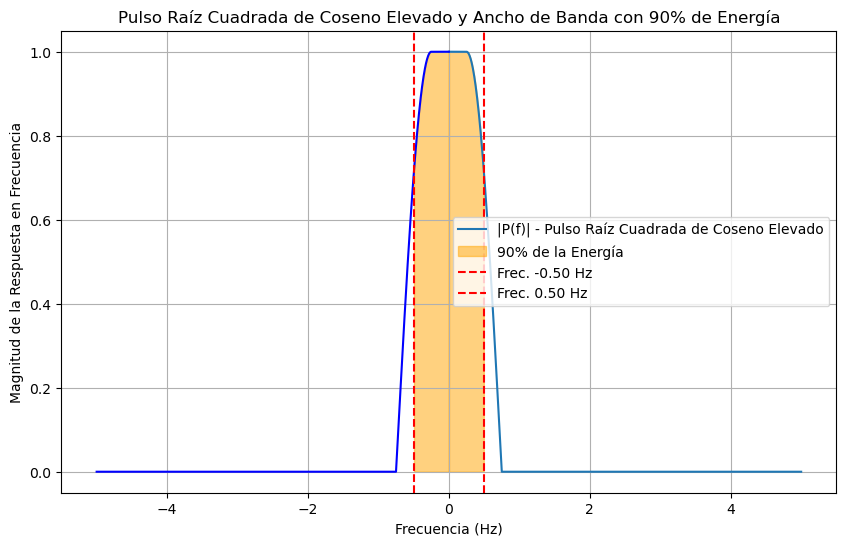

In [27]:
# Parámetros
T = 1  # Duración del símbolo
alpha = 0.5  # Factor de roll-off (puedes variar entre 0 y 1)
f_max = 5 / T  # Frecuencia máxima para la gráfica
N = 1000  # Número de puntos para la gráfica

# Vector de frecuencias positivas
f = np.linspace(0, f_max, N)

# Función de la respuesta en frecuencia del pulso raíz cuadrada de coseno elevado
def P_f_raiz_coseno_elevado(f, T, alpha):
    B = (1 + alpha) / (2 * T)
    f0 = (1 - alpha) / (2 * T)
    abs_f = np.abs(f)
    H_f = np.zeros_like(abs_f)
    condition1 = abs_f < f0
    condition2 = (abs_f >= f0) & (abs_f <= B)
    H_f[condition1] = np.sqrt(T)
    H_f[condition2] = np.sqrt((T / 2) * (1 + np.cos(np.pi * T / alpha * (abs_f[condition2] - f0))))
    # Fuera del rango, H_f ya es cero
    return H_f

# Cálculo de la respuesta en frecuencia
P_f = P_f_raiz_coseno_elevado(f, T, alpha)

# Densidad espectral de potencia
PSD = np.abs(P_f) ** 2

# Energía total (integración numérica)
B = (1 + alpha) / (2 * T)
# Integramos de 0 a B y multiplicamos por 2 por simetría
energia_total, _ = quad(lambda freq: (P_f_raiz_coseno_elevado(freq, T, alpha)) ** 2, 0, B, limit=1000)
energia_total *= 2  # Por simetría

# Cálculo de la energía acumulada de manera simétrica
energia_acumulada = np.zeros_like(f)
for i in range(len(f)):
    f_i = f[i]
    # Nos aseguramos de no exceder el ancho de banda máximo B
    if f_i > B:
        f_i = B
    energia_i, _ = quad(lambda freq: (P_f_raiz_coseno_elevado(freq, T, alpha)) ** 2, 0, f_i, limit=1000)
    energia_acumulada[i] = energia_i * 2  # Por simetría

# Normalización de la energía acumulada
energia_acumulada = energia_acumulada / energia_total

# Encontrar la frecuencia que contiene el 90% de la energía
indice_90 = np.where(energia_acumulada >= 0.9)[0][0]
f_90 = f[indice_90]
ancho_banda_90 = 2 * f_90  # Ancho de banda total desde -f_90 hasta f_90

print(f"Ancho de banda que contiene el 90% de la energía: {ancho_banda_90:.4f} Hz")

# Gráfica de la magnitud de la respuesta en frecuencia
plt.figure(figsize=(10, 6))

# Gráfica para frecuencias positivas
plt.plot(f, np.abs(P_f), label='|P(f)| - Pulso Raíz Cuadrada de Coseno Elevado')
plt.fill_between(f[:indice_90 + 1], np.abs(P_f[:indice_90 + 1]), color='orange', alpha=0.5, label='90% de la Energía')

# Gráfica para frecuencias negativas (reflexión)
plt.plot(-f, np.abs(P_f), color='blue')
plt.fill_between(-f[:indice_90 + 1], np.abs(P_f[:indice_90 + 1]), color='orange', alpha=0.5)

# Líneas verticales que indican las frecuencias límites
plt.axvline(x=-f_90, color='r', linestyle='--', label=f'Frec. -{f_90:.2f} Hz')
plt.axvline(x=f_90, color='r', linestyle='--', label=f'Frec. {f_90:.2f} Hz')

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud de la Respuesta en Frecuencia')
plt.title('Pulso Raíz Cuadrada de Coseno Elevado y Ancho de Banda con 90% de Energía')
plt.legend()
plt.grid(True)
plt.show()


Este código tiene como objetivo demostrar cómo el uso de un pulso de raíz cuadrada de coseno elevado (RRC) y un filtro adaptado en el receptor permite eliminar la interferencia entre símbolos (ISI) en una comunicación digital 2-PAM (modulación por amplitud de pulso binaria).

Número de errores: 0 de 10 bits transmitidos


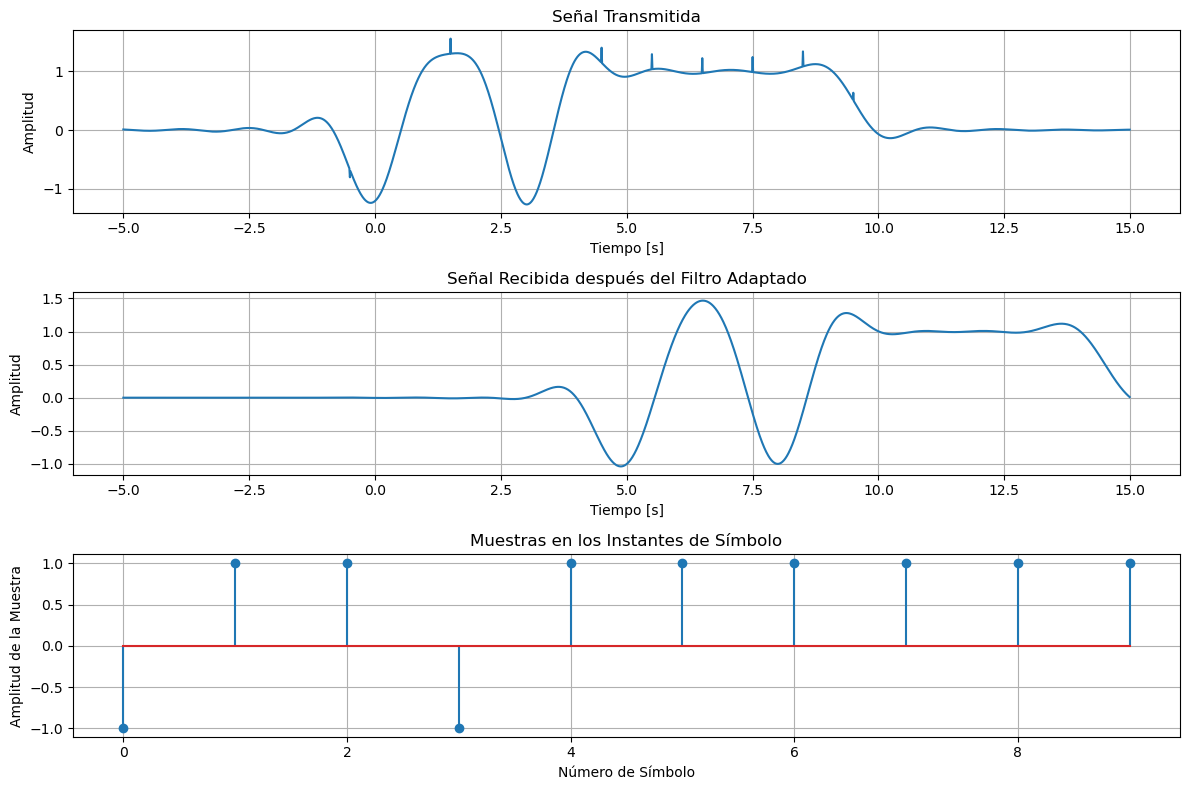

In [28]:
# Parámetros
T = 1          # Duración del símbolo
alpha = 0.5    # Factor de roll-off
fs = 100       # Frecuencia de muestreo (debe ser mayor que 2*(1+alpha)/T)
N_bits = 10    # Número de bits transmitidos

# Vector de tiempo
t = np.arange(-5*T, (N_bits + 5)*T, 1/fs)

# Función del pulso de raíz cuadrada de coseno elevado
def rrc_pulse(t, T, alpha):
    t = np.where(t == 0, 1e-20, t)  # Evitar división por cero
    pi_t = np.pi * t / T
    four_alpha_t = 4 * alpha * t / T
    denom = 1 - four_alpha_t**2
    pulse = np.zeros_like(t)
    # Condición donde denom != 0
    idx = np.abs(denom) > 1e-10
    pulse[idx] = (np.sin(pi_t[idx] * (1 - alpha)) + four_alpha_t[idx] * np.cos(pi_t[idx] * (1 + alpha))) / (pi_t[idx] * denom[idx])
    # Condición donde denom == 0
    idx = np.abs(denom) <= 1e-10
    pulse[idx] = (np.pi / 4) * np.sinc(alpha * t[idx] / T)
    return pulse

# Generación del pulso
p_t = rrc_pulse(t, T, alpha)

# Señal de información (bits aleatorios)
np.random.seed(0)  # Para reproducibilidad
bits = np.random.choice([-1, 1], N_bits)  # Señal 2-PAM

# Señal transmitida
s_t = np.zeros_like(t)
for i, bit in enumerate(bits):
    s_t += bit * rrc_pulse(t - i*T, T, alpha)

# Filtro adaptado (misma respuesta al impulso invertida en el tiempo)
h_t = p_t[::-1]
# Convolución de la señal transmitida con el filtro adaptado
r_t = np.convolve(s_t, h_t, mode='same') / fs  # Normalización por fs

# Muestreo en los instantes óptimos
sampling_times = np.array([i*T for i in range(N_bits)]) * fs + len(t)//2
sampling_indices = sampling_times.astype(int)
samples = r_t[sampling_indices]

# Decisión en el receptor
detected_bits = np.sign(samples)

# Cálculo de errores
errors = bits - detected_bits
num_errors = np.sum(errors != 0)

print(f"Número de errores: {num_errors} de {N_bits} bits transmitidos")

# Gráficas
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, s_t)
plt.title('Señal Transmitida')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, r_t)
plt.title('Señal Recibida después del Filtro Adaptado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(range(N_bits), samples)  # Eliminado use_line_collection=True
plt.title('Muestras en los Instantes de Símbolo')
plt.xlabel('Número de Símbolo')
plt.ylabel('Amplitud de la Muestra')
plt.grid(True)

plt.tight_layout()
plt.show()


Este código tiene como objetivo demostrar cómo un pulso rectangular, al pasar por un canal pasa-bajo, sufre de interferencia entre símbolos (ISI), lo que provoca errores en la detección de los bits transmitidos.

In [29]:
from scipy.signal import lfilter

Número de errores: 2 de 10 bits transmitidos


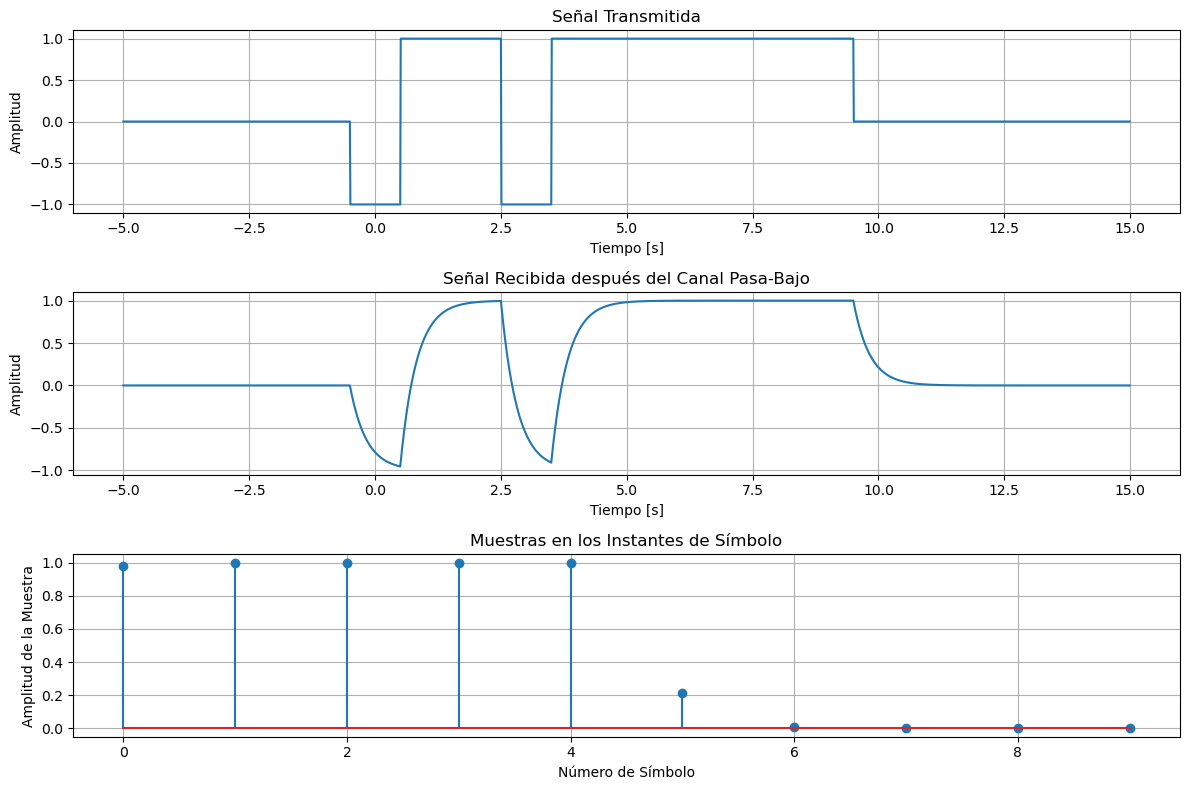

In [30]:
# Parámetros
T = 1          # Duración del símbolo
fs = 100       # Frecuencia de muestreo
N_bits = 10    # Número de bits transmitidos

# Vector de tiempo
t = np.arange(-5*T, (N_bits + 5)*T, 1/fs)

# Función del pulso rectangular
def rect_pulse(t, T):
    return np.where(np.abs(t) <= T/2, 1, 0)

# Generación del pulso
p_t = rect_pulse(t, T)

# Señal de información (bits aleatorios)
np.random.seed(0)
bits = np.random.choice([-1, 1], N_bits)

# Señal transmitida
s_t = np.zeros_like(t)
for i, bit in enumerate(bits):
    s_t += bit * rect_pulse(t - i*T, T)

# Canal pasa-bajo de un polo
fc = 0.5  # Frecuencia de corte en Hz
RC = 1 / (2 * np.pi * fc)
dt = 1 / fs
alpha_channel = dt / (RC + dt)
b_channel = [alpha_channel]
a_channel = [1, alpha_channel - 1]

# Filtrado de la señal
r_t = lfilter(b_channel, a_channel, s_t)

# Muestreo en instantes óptimos
sampling_times = np.array([i*T for i in range(N_bits)]) * fs + len(t)//2
sampling_indices = sampling_times.astype(int)
samples = r_t[sampling_indices]

# Decisión en el receptor
detected_bits = np.sign(samples)

# Cálculo de errores
errors = bits - detected_bits
num_errors = np.sum(errors != 0)

print(f"Número de errores: {num_errors} de {N_bits} bits transmitidos")

# Gráficas
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, s_t)
plt.title('Señal Transmitida')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, r_t)
plt.title('Señal Recibida después del Canal Pasa-Bajo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(range(N_bits), samples)  # Eliminado use_line_collection=True
plt.title('Muestras en los Instantes de Símbolo')
plt.xlabel('Número de Símbolo')
plt.ylabel('Amplitud de la Muestra')
plt.grid(True)

plt.tight_layout()
plt.show()


Este código busca demostrar que, incluso cuando una señal 2-PAM con pulsos de raíz cuadrada de coseno elevado pasa por un canal pasa-bajo (que introduce ISI), el uso de un filtro adaptado en el receptor puede reducir significativamente la interferencia entre símbolos y mejorar la detección de los bits.

Número de errores: 0 de 10 bits transmitidos


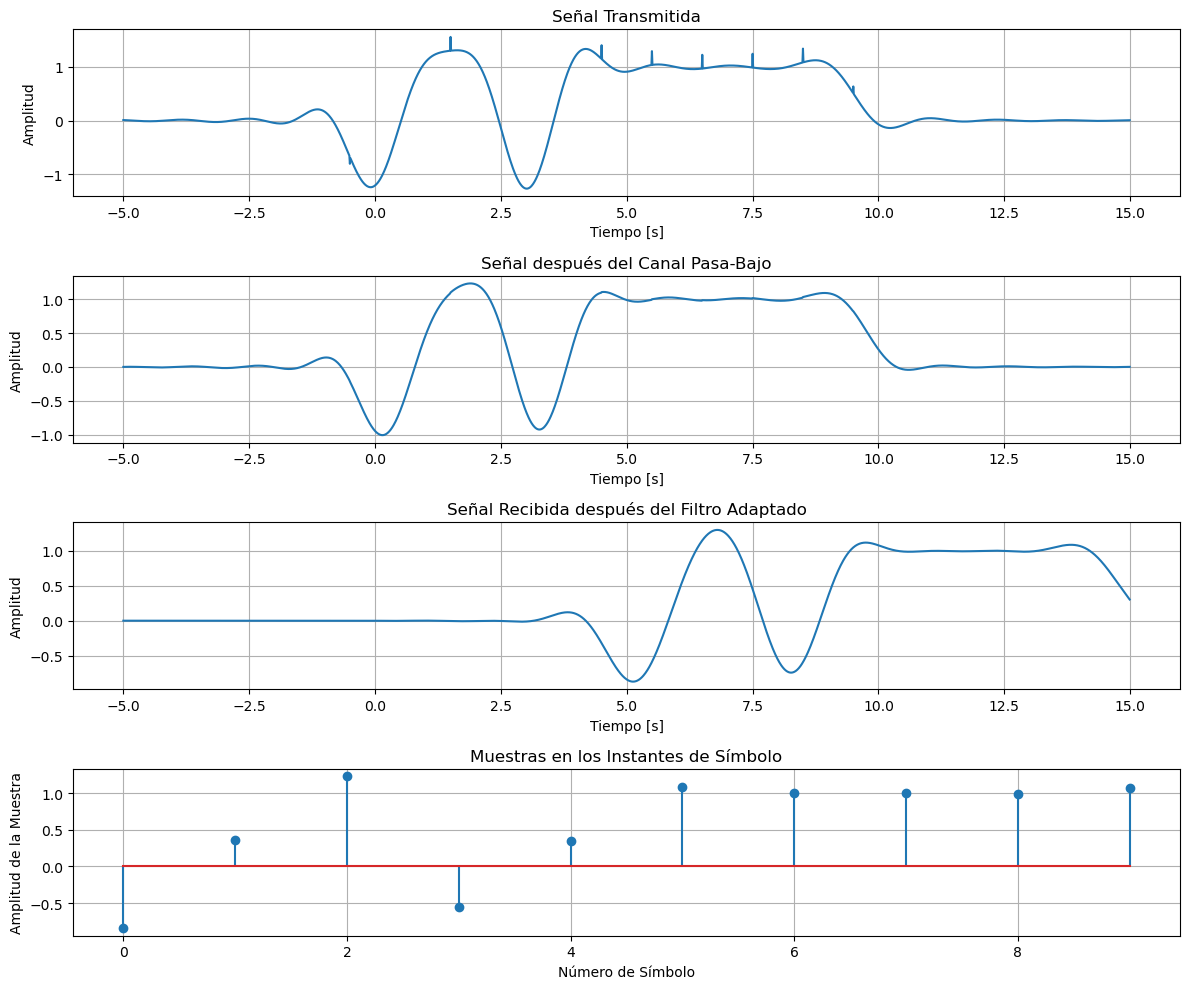

In [31]:
# Parámetros
T = 1          # Duración del símbolo
alpha = 0.5    # Factor de roll-off
fs = 100       # Frecuencia de muestreo
N_bits = 10    # Número de bits transmitidos

# Vector de tiempo
t = np.arange(-5*T, (N_bits + 5)*T, 1/fs)

# Función del pulso de raíz cuadrada de coseno elevado
def rrc_pulse(t, T, alpha):
    t = np.where(t == 0, 1e-20, t)  # Evitar división por cero
    pi_t = np.pi * t / T
    four_alpha_t = 4 * alpha * t / T
    denom = 1 - four_alpha_t**2
    pulse = np.zeros_like(t)
    # Condición donde denom != 0
    idx = np.abs(denom) > 1e-10
    pulse[idx] = (np.sin(pi_t[idx] * (1 - alpha)) + four_alpha_t[idx] * np.cos(pi_t[idx] * (1 + alpha))) / (pi_t[idx] * denom[idx])
    # Condición donde denom == 0
    idx = np.abs(denom) <= 1e-10
    pulse[idx] = (np.pi / 4) * np.sinc(alpha * t[idx] / T)
    return pulse

# Generación del pulso
p_t = rrc_pulse(t, T, alpha)

# Señal de información (bits aleatorios)
np.random.seed(0)
bits = np.random.choice([-1, 1], N_bits)

# Señal transmitida
s_t = np.zeros_like(t)
for i, bit in enumerate(bits):
    s_t += bit * rrc_pulse(t - i*T, T, alpha)

# Canal pasa-bajo de un polo
fc = 0.5  # Frecuencia de corte en Hz
RC = 1 / (2 * np.pi * fc)
dt = 1 / fs
alpha_channel = dt / (RC + dt)
b_channel = [alpha_channel]
a_channel = [1, alpha_channel - 1]

# Filtrado de la señal por el canal
s_channel = lfilter(b_channel, a_channel, s_t)

# Filtro adaptado (misma respuesta al impulso invertida en el tiempo)
h_t = p_t[::-1]
# Convolución de la señal filtrada por el canal con el filtro adaptado
r_t = np.convolve(s_channel, h_t, mode='same') / fs  # Normalización por fs

# Muestreo y Decisión
sampling_times = np.array([i*T for i in range(N_bits)]) * fs + len(t)//2
sampling_indices = sampling_times.astype(int)
samples = r_t[sampling_indices]

# Decisión en el receptor
detected_bits = np.sign(samples)

# Cálculo de errores
errors = bits - detected_bits
num_errors = np.sum(errors != 0)

print(f"Número de errores: {num_errors} de {N_bits} bits transmitidos")

# Gráficas
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(t, s_t)
plt.title('Señal Transmitida')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, s_channel)
plt.title('Señal después del Canal Pasa-Bajo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, r_t)
plt.title('Señal Recibida después del Filtro Adaptado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.stem(range(N_bits), samples)  # Eliminado use_line_collection=True
plt.title('Muestras en los Instantes de Símbolo')
plt.xlabel('Número de Símbolo')
plt.ylabel('Amplitud de la Muestra')
plt.grid(True)

plt.tight_layout()
plt.show()
